It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/CNN/Introduction_to_CNN.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Introduction_to_CNN.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

<a id='Image Filtering'></a>
# Image Filtering

In [129]:
## if you have a GPU
GPU=True
#%tensorflow_version 2.x
import tensorflow as tf
if GPU:
    device_name = tf.test.gpu_device_name()
    if device_name != '/device:GPU:0':
        raise SystemError('GPU device not found')
    print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [130]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

Load the example image.

Load the example image.

You can download the image with an image url using [get_file](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file)
```python
tf.keras.utils.get_file(
    fname, origin, untar=False, md5_hash=None, file_hash=None,
    cache_subdir='datasets', hash_algorithm='auto',
    extract=False, archive_format='auto', cache_dir=None
)
```

Descargamos la imagen a partir del url y la ponemos un nombre. Si cambiamos de imagen hay que cambiar de nombre porque sino se sobreescribe. 

In [4]:
img_folder= '../../images'
#url = "https://github.com/ezponda/intro_deep_learning/blob/main/images/taj-mahal.png"
url = 'https://i.ibb.co/vd1SqSM/The-grandeur-of-the-Taj-Mahal-and-its-intricate-stone-inlays-immediately-greets-the-visitor-upon-ent.jpg'
image_path = tf.keras.utils.get_file("taj-mahal-2.jpg", url)
#pic = 'taj-mahal.jpg'
#image_path = os.path.join(img_folder, pic)

147456/138206 [================================] - 0s 1us/step


In [5]:
def read_image(image_path, target_size=None):
    image = tf.keras.preprocessing.image.load_img(image_path,
                target_size=target_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image.astype(np.uint8)
    return image

image = read_image(image_path)

We can see that the dimensions of the image are (468, 468, 3). 

That is, the image has a resolution of **468x468 pixels**, with **3 color channels (Red, Green and Blue)**.

In [6]:
image.shape

(468, 468, 3)

Observamos que la imagen es una matriz de 468x468x3 porque son 3 colores.

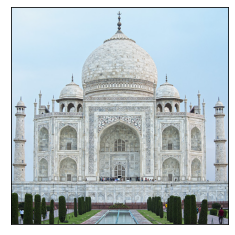

In [7]:
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

### Convolution examples

The following kernel performs the identity operation. The result of the convolution returns the original image.

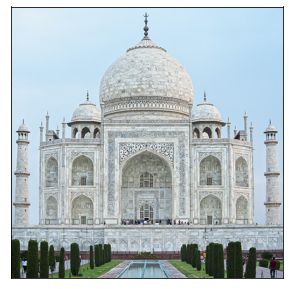

In [8]:
identity_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

img = cv2.filter2D(image, -1, identity_kernel)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(img);

The following filter applies the [Box Blur] (https://en.wikipedia.org/wiki/Box_blur), where each pixel of the resulting image has a value equal to the mean of its pixel values neighbors.

Realiza un promedio de los pixeles de la imagen haciendo que se difuminen los bordes y se vean un poco mas los detalles. La puerta por ejemplo.

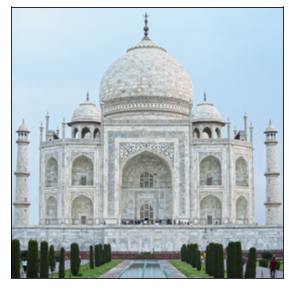

In [9]:
box_blur_filter = (1/9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

img = cv2.filter2D(image, -1, box_blur_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(img);

The following example shows a filter widely used in digital image processing: the [Gaussian filtering] (https://en.wikipedia.org/wiki/Gaussian_blur).

Puede llegar a mejorar la imagen

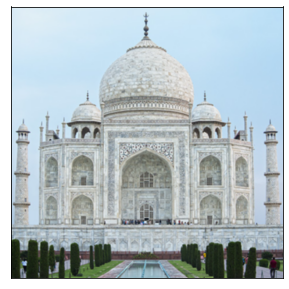

In [10]:
gaussian_blur_filter = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

img = cv2.filter2D(image, -1, gaussian_blur_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(img);

We can gaussian noise to the image and see the effects 

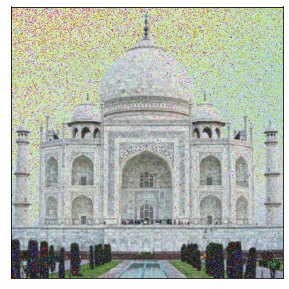

In [11]:
sigma = 20
n, m, k = image.shape
img_noise = img + sigma*np.random.randn(n, m, k)
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(img_noise.astype(np.uint8));

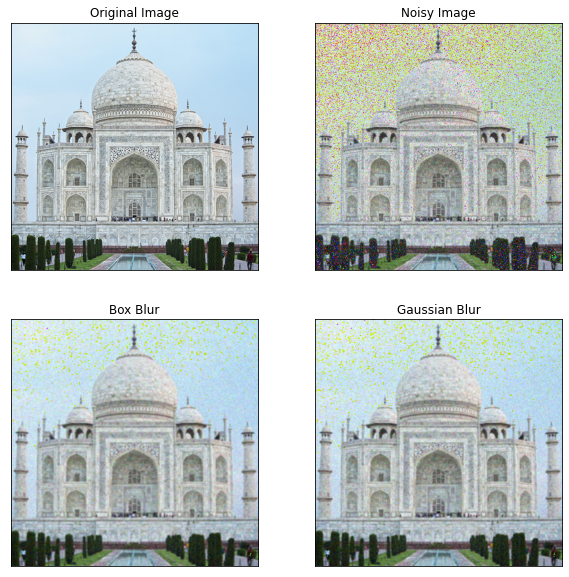

In [12]:
img1 = cv2.filter2D(img_noise, -1, gaussian_blur_filter)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
ax[0, 0].set_title('Original Image')
ax[0, 0].imshow(image.astype(np.uint8));

ax[0, 1].set_title('Noisy Image')
ax[0, 1].imshow(img_noise.astype(np.uint8));

ax[1, 0].set_title('Box Blur')
ax[1, 0].imshow(cv2.filter2D(img_noise, -1, box_blur_filter).astype(np.uint8));

ax[1, 1].set_title('Gaussian Blur')
ax[1, 1].imshow(cv2.filter2D(img_noise, -1, gaussian_blur_filter).astype(np.uint8));

The following filter is used for edge detection in images.

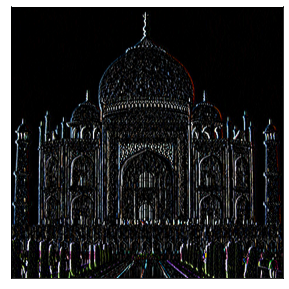

In [13]:
edge_detection_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

img = cv2.filter2D(image, -1, edge_detection_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])

plt.imshow(img);

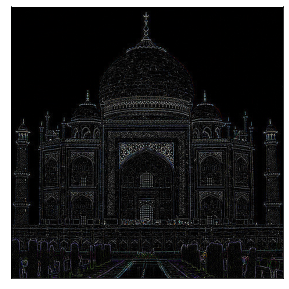

In [14]:
edge_detection_filter = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

img = cv2.filter2D(image, -1, edge_detection_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])

plt.imshow(img);

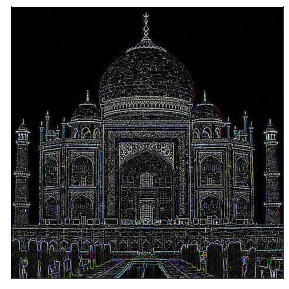

In [15]:
edge_detection_filter = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

img = cv2.filter2D(image, -1, edge_detection_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])

plt.imshow(img);

The following filter allows you to highlight the edges of the image by increasing its contrast. The filter is the result of subtracting the matrix of an edge detection filter from the matrix of an identity filter:

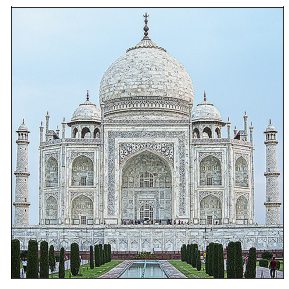

In [16]:
sharpen_flter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

img = cv2.filter2D(image, -1, sharpen_flter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.imshow(img);

OpenCV provides a multitude of techniques for digital image processing. Other examples of filters that we can apply to images are, for example, those that allow us to perform [morphological transformations](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html).

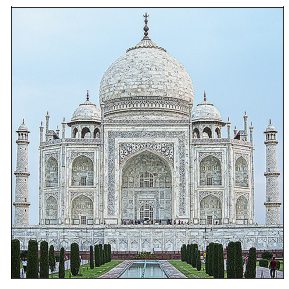

In [17]:
kernel = np.ones((1, 1), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=1)


fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.imshow(dilation)

<a id='image_classification_cnn'></a>
# Image Classification CNN

In this section we will study the problem of classifying images with convolutional neural networks (CNN). To do this, we will rely on the [TensorFlow tutorial](https://www.tensorflow.org/tutorials/images/classification).

We will start with the download of the dataset. We will work with a set of **~ 3700 photographs** of flowers from **5 different classes**.

In [18]:
import pathlib
import tensorflow as tf
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 1s 0us/step


We check that we have all the photographs.

In [19]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


Vemos que nuestros datos estan organizados en carpetas

In [20]:
os.listdir(data_dir)

['tulips', 'sunflowers', 'daisy', 'roses', 'LICENSE.txt', 'dandelion']

Visualize some of them

In [21]:
roses = list(data_dir.glob('roses/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))

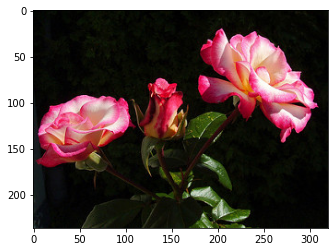

In [22]:
im = read_image(str(roses[np.random.randint(0, len(roses))]))
plt.imshow(im);

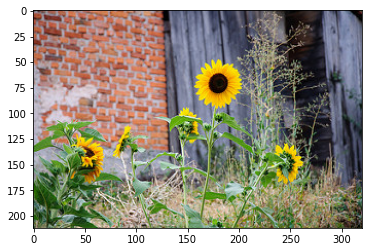

In [23]:
im = read_image(str(sunflowers[np.random.randint(0, len(sunflowers))]))
plt.imshow(im);

We create a TensorFlow dataset with the data that we have previously loaded to disk with the [`image_dataset_from_directory ()`](https://keras.io/api/preprocessing/image/#image_dataset_from_directory-function)
method.

The `colos_mode` parameter (by default 'rgb') allows you to choose the color scale to use. To automatically load and convert the images to grayscale it must be set as `color_mode = grayscale`.

Vamos a crear un clasificador de las flores. Para ello vamos a usar una funcion de Keras que es crear un dataset desde el directorio, lo que hará será recorrer las carpetas con los tipos de flores y lo va a ir guardando en batches que nosotros pongamos. Uno para el training y otro para el validation, y le vamos a poner un tamao de imagen de 96x96. Podriamos ponerle el tamaño de imagen que queramos. 

In [24]:
image_size = (96,96)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  # 80%  train, 20% validation
  subset='training',  # 'training' o 'validation', only  with 'validation_split'
  seed=1,
  image_size=image_size,  # Dimension (img_height, img_width) for rescaling
  batch_size=64
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [25]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset='validation',
  seed=1,
  image_size=image_size,
  batch_size=64)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [26]:
class_names_list = train_ds.class_names
class_names_list

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

### Configure the dataset for performance

Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training. 

Interested readers can learn more about both methods, as well as how to cache data to disk in the [data performance guide](https://www.tensorflow.org/guide/data_performance#prefetching).

Nosotros vamos a querer ir guardando las imágenes en la memoria RAM para no tener que estar cargandolas constantemente y no perder tiempo. Si no ejecutamos esta celda se nota la diferencia de velocidad. 

In [27]:
 AUTOTUNE = tf.data.AUTOTUNE

 train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
 val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Visualizing some training samples.

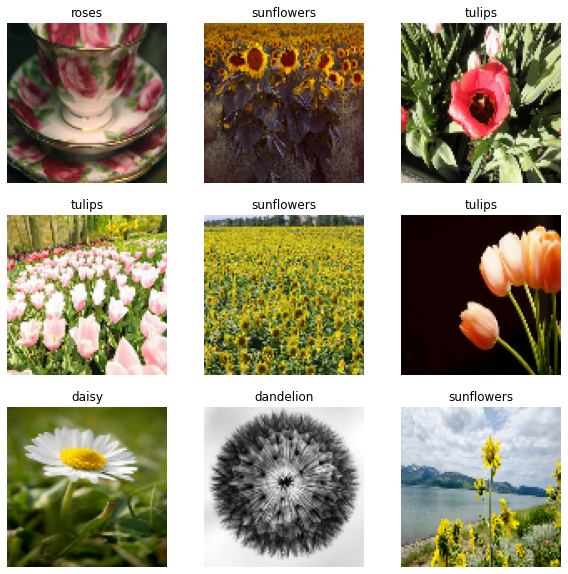

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names_list[labels[i]])
        plt.axis("off")

We build the model. The **input will have a dimension of (n, n, 3)**, corresponding to (image height, image width, number of color channels).

At the input of the network we include a preprocessing that will allow the images to be rescaled by normalizing the pixel values to a range between 0 and 1.

In [29]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 96, 96, 3)
(64,)


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## CNN model in Keras



<img src="https://i.ibb.co/D8CmT6K/cnn.jpg" alt="cnn" border="0">



A Convolutional Neural Network (CNN) architecture has four main parts:

- A **convolutional layer** that extracts features from a source image. 

- A **pooling layer** that reduces the image dimensionality without losing important features or patterns.

- A **flattening layer** that transforms a n-dimensional tensor into a vector that can be fed into a fully connected neural network.

- A **fully connected layer** also known as the dense layer.

### Rescaling

For converting the images to   \[0,1\] range.
```python
normalization_layer = layers.Rescaling(1./255)
next_layer = normalization_layer(prev_layer)
```
or simply
```python
reescaling = layers.Rescaling(1. / 255)(inputs)
```

### Convolutional layer

In the convolutional layers (`Conv2D`) we will configure the following parameters:

- **filters**: number of feature maps.
- **kernel_size**: can be either an integer or a tuple of two integers. Specifies the height and width of the kernel.
- **padding**: allows you to include padding in the input data. With 'valid' it is not applied, with 'same' it is configured so that the dimension at the output of the convolution is the same as at the input.
- **activation**: activation function implemented. Recommended ReLU.

[Link to documentation](https://keras.io/api/layers/convolution_layers/convolution2d/)

```python
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    activation=None, kernel_regularizer=None)

```

With Functional API:
```python
next_layer = layers.Conv2D(filters=8, kernel_size=3, activation='relu', name='conv_1')(prev_layer)
```

With Sequential:
```python
model.add(layers.Conv2D(filters=8,kernel_size=3, activation='relu', name='conv_1'))
```

### Pooling layer

A pooling layer is a new layer added after the convolutional layer. Specifically, after a nonlinearity ( ReLU) you can choose between [average pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D) or [max pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D). Usually max pooling is the best choice.


With Functional API:
```python
conv_1 = layers.Conv2D(filters=8, kernel_size=3, activation='relu', name='conv_1')(prev_layer)

pool_1 = layers.MaxPool2D(pool_size=(2, 2), name='pool_1')(conv_1)
```

With Sequential:
```python
model.add(layers.AveragePooling2D(pool_size=(2, 2), name='pool_1'))
```

### Flattening

Prepares a vector for the fully connected layers.

With Functional API:

```python
next_layer = layers.Flatten(name='flatten')(prev_layer)
```

With Sequential:
```python
model.add(layers.Flatten(name='flatten'))
```

There is another alternative for flattening that is a type of pooling that is called global pooling. Global pooling down-samples the entire feature map to a single value. 

You can also choose between [GlobalAveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D) and [GlobalMaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool2D).

```python
model.add(layers.GlobalMaxPool2D(name='GlobalMaxPooling2D'))
```

### Fully-connected layer

Dense layer like a simple neural network

Vamos a ver un ejemplo muy sencillo, una red convolucional con dos capas, una convolucion y un pool, una convolucion y un pool.Cuatro filtros con tamaño de 3, la ventana que va a recorrer es de tamaño 3x3. El pooling será de 2x2

In [31]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
reescaling = layers.Rescaling(1. / 255)(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(4, 3, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(4, 3, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(conv_2)


# Fully-connected
# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')

In [32]:
model.summary()

Model: "cnn_example"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 96, 96, 3)         0         
                                                                 
 conv_1 (Conv2D)             (None, 94, 94, 4)         112       
                                                                 
 pool_1 (MaxPooling2D)       (None, 47, 47, 4)         0         
                                                                 
 conv_2 (Conv2D)             (None, 45, 45, 4)         148       
                                                                 
 pool_2 (MaxPooling2D)       (None, 22, 22, 4)         0         
                                                                 
 flatten (Flatten)           (None, 1936)              

Observamos que tiene pocos parámetros hasta la parte de fully connected que aumenta mucho los parámetros. 

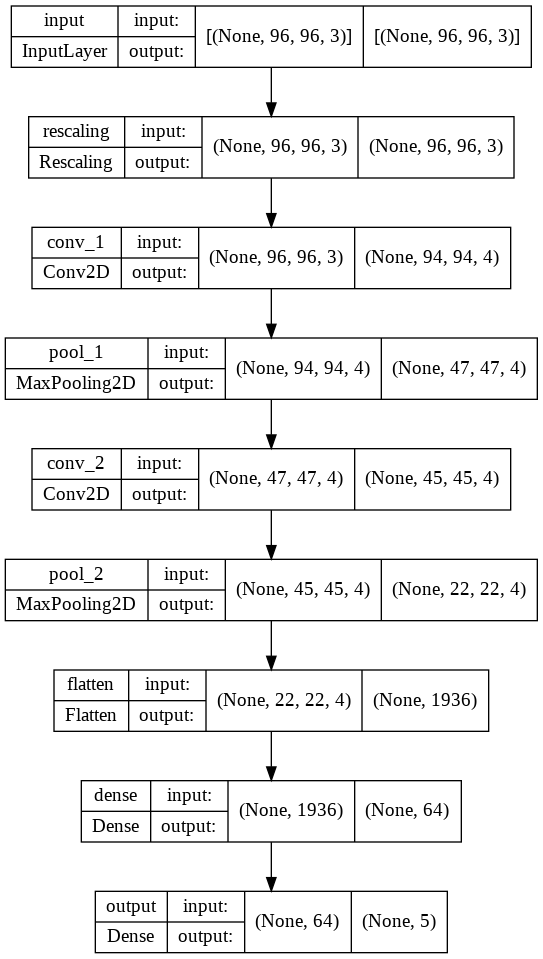

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

Recordamos que nuestro modelo tiene 5 flores diferentes x lo tanto la ultima capa tiene 5 neuronas y su función de activación será una softmax.

Compile the model

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Training the model

In [35]:
epochs = 8
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Epoch 1/8
46/46 [==============================] - 13s 33ms/step - loss: 1.5385 - accuracy: 0.3154 - val_loss: 1.4124 - val_accuracy: 0.4114
Epoch 2/8
46/46 [==============================] - 0s 11ms/step - loss: 1.3532 - accuracy: 0.4353 - val_loss: 1.2962 - val_accuracy: 0.4441
Epoch 3/8
46/46 [==============================] - 0s 9ms/step - loss: 1.2014 - accuracy: 0.5167 - val_loss: 1.1617 - val_accuracy: 0.5409
Epoch 4/8
46/46 [==============================] - 0s 8ms/step - loss: 1.1028 - accuracy: 0.5606 - val_loss: 1.1516 - val_accuracy: 0.5286
Epoch 5/8
46/46 [==============================] - 0s 9ms/step - loss: 0.9860 - accuracy: 0.6209 - val_loss: 1.1103 - val_accuracy: 0.5531
Epoch 6/8
46/46 [==============================] - 0s 8ms/step - loss: 0.9100 - accuracy: 0.6495 - val_loss: 1.1008 - val_accuracy: 0.5668
Epoch 7/8
46/46 [==============================] - 0s 9ms/step - loss: 0.8456 - accuracy: 0.6795 - val_loss: 1.1046 - val_accuracy: 0.5599
Epoch 8/8
46/46 [=======

Visualize the results

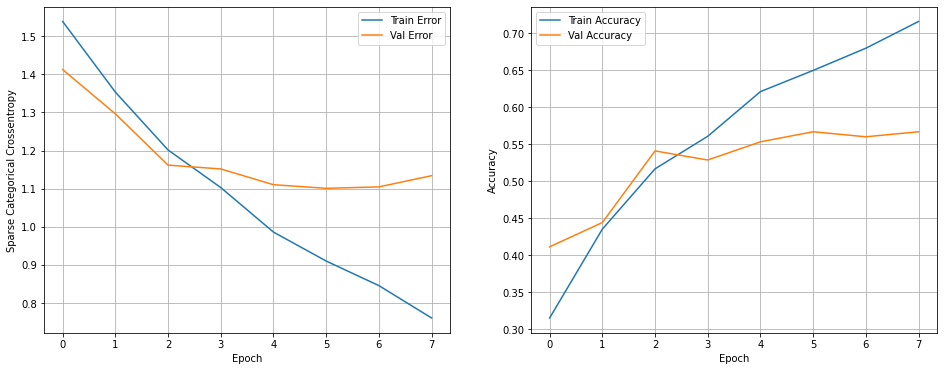

In [36]:
import pandas as pd
def show_loss_accuracy_evolution(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Sparse Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

show_loss_accuracy_evolution(history)

Plot bad predictions

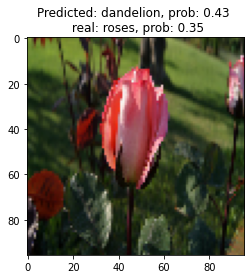

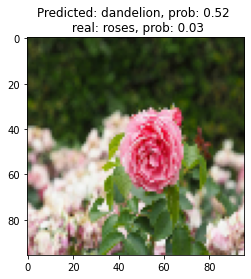

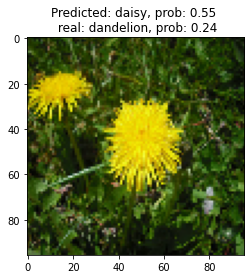

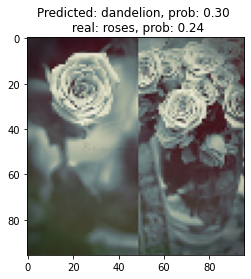

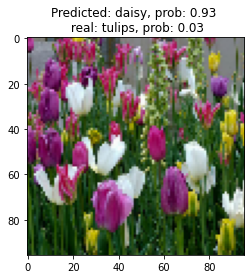

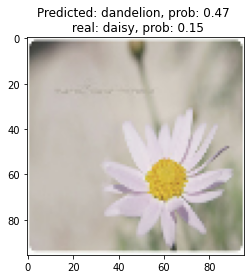

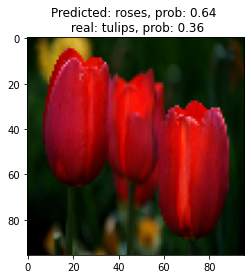

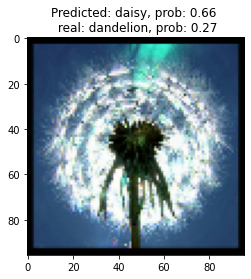

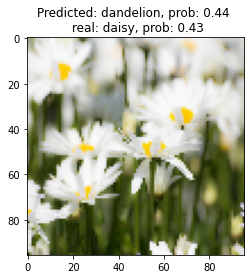

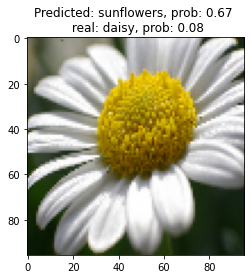

In [37]:
def show_errors(val_ds, model, class_names_list, n_images=10):
    n_plots = 0
    for images, labels in val_ds:
        pred_probs = model.predict(images)
        preds = pred_probs.argmax(axis=-1)
        bad_pred_inds = np.where(preds != labels)[0]
        for ind in list(bad_pred_inds):
            n_plots += 1
            real_class = class_names_list[labels[ind].numpy()]
            pred_class = class_names_list[preds[ind]]
            prob = pred_probs[ind].max()
            prob_real = pred_probs[ind][[
                i for i, c in enumerate(class_names_list) if c == real_class
            ][0]]
            plt.imshow(images[ind].numpy().astype("uint8"))
            plt.title(
                'Predicted: {0}, prob: {1:.2f} \n real: {2}, prob: {3:.2f}'
                .format(pred_class, prob, real_class, prob_real))
            plt.show()

            if n_plots == n_images:
                return
    return


show_errors(val_ds, model, class_names_list, n_images=10)

#### Question 1: What happen with the validation loss and with the number of parameters if you increment the number of filters and the kernel_size ?

El accuracy disminuye

Model: "cnn_example"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 96, 96, 3)         0         
                                                                 
 conv_1 (Conv2D)             (None, 93, 93, 10)        490       
                                                                 
 pool_1 (MaxPooling2D)       (None, 46, 46, 10)        0         
                                                                 
 conv_2 (Conv2D)             (None, 43, 43, 10)        1610      
                                                                 
 pool_2 (MaxPooling2D)       (None, 21, 21, 10)        0         
                                                                 
 flatten (Flatten)           (None, 4410)              

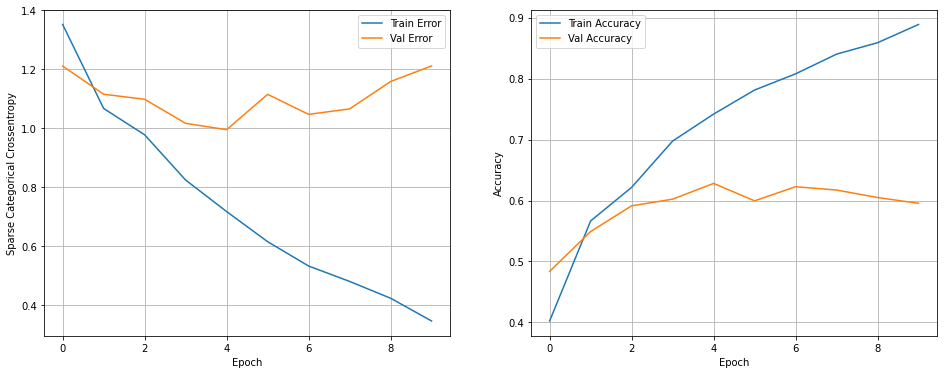

In [39]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
reescaling = layers.Rescaling(1. / 255)(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(10, 4, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(10, 4, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(conv_2)


# Fully-connected
# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')

print(model.summary())

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)
show_loss_accuracy_evolution(history)

#### Question 2: What happen with the validation loss and with the number of parameters if you vary  the `pool_size` and the padding of the filters to `same` ?

El numero de parámetros disminuye al igual que el validation loss.

Model: "cnn_example"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 96, 96, 3)         0         
                                                                 
 conv_1 (Conv2D)             (None, 96, 96, 4)         112       
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 4)         0         
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 4)         148       
                                                                 
 pool_2 (MaxPooling2D)       (None, 10, 10, 4)         0         
                                                                 
 flatten (Flatten)           (None, 400)               

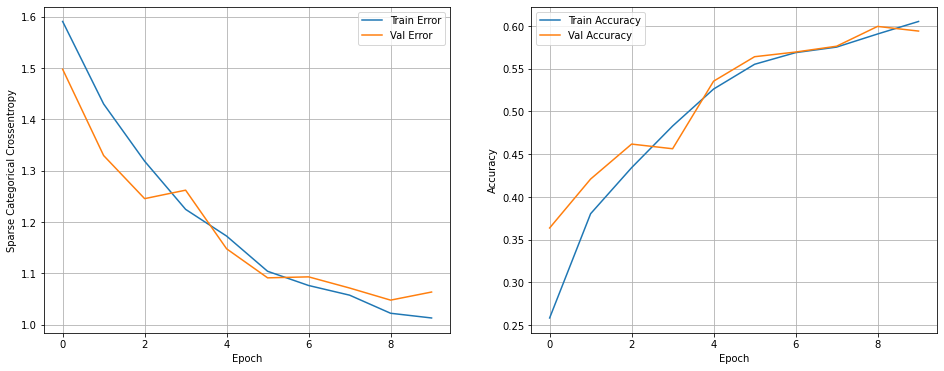

In [40]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
reescaling = layers.Rescaling(1. / 255)(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(4, 3, padding='same', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(3,3), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(4, 3, padding='same', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(3, 3), name='pool_2')(conv_2)

# Fully-connected
# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')

print(model.summary())

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)
show_loss_accuracy_evolution(history)

#### Question 3: Create a model with `val_accuracy > 0.72`

You can use early-stopping callback and dropouts techniques.

```python
next_layer = layers.Dropout(0.4)(prev_layer)
```

```python
next_layer = layers.BatchNormalization()(prev_layer)
```

```python
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=5,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)
```

In [123]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
reescaling = layers.Rescaling(1. / 255)(inputs)

#kernel_regularizer_l2 = keras.regularizers.l2(5e-4)

# Conv Layer 1
conv_1 = layers.Conv2D(4, 3, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(2,2), name='pool_1')(conv_1)

pool_1 = layers.Dropout(0.5)(pool_1)




#Conv Layer 2
conv_2 = layers.Conv2D(4, 3, padding='valid', activation='relu',
                     name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(conv_2)

pool_2 = layers.Dropout(0.5)(pool_2)



# Fully-connected
# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
dense = layers.Dropout(0.5)(dense)


outputs = layers.Dense(5, activation='softmax', name='output')(dense)
model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')


In [124]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Epoch 1/25
46/46 [==============================] - 1s 13ms/step - loss: 1.5716 - accuracy: 0.2663 - val_loss: 1.4975 - val_accuracy: 0.4414
Epoch 2/25
46/46 [==============================] - 0s 9ms/step - loss: 1.4177 - accuracy: 0.3515 - val_loss: 1.3977 - val_accuracy: 0.3883
Epoch 3/25
46/46 [==============================] - 0s 9ms/step - loss: 1.3650 - accuracy: 0.4128 - val_loss: 1.3576 - val_accuracy: 0.4441
Epoch 4/25
46/46 [==============================] - 0s 9ms/step - loss: 1.3172 - accuracy: 0.4452 - val_loss: 1.3156 - val_accuracy: 0.4605
Epoch 5/25
46/46 [==============================] - 0s 9ms/step - loss: 1.2571 - accuracy: 0.4693 - val_loss: 1.2704 - val_accuracy: 0.4469
Epoch 6/25
46/46 [==============================] - 0s 9ms/step - loss: 1.2200 - accuracy: 0.5014 - val_loss: 1.2176 - val_accuracy: 0.5204
Epoch 7/25
46/46 [==============================] - 0s 9ms/step - loss: 1.1966 - accuracy: 0.5184 - val_loss: 1.1950 - val_accuracy: 0.5054
Epoch 8/25
46/46 [=

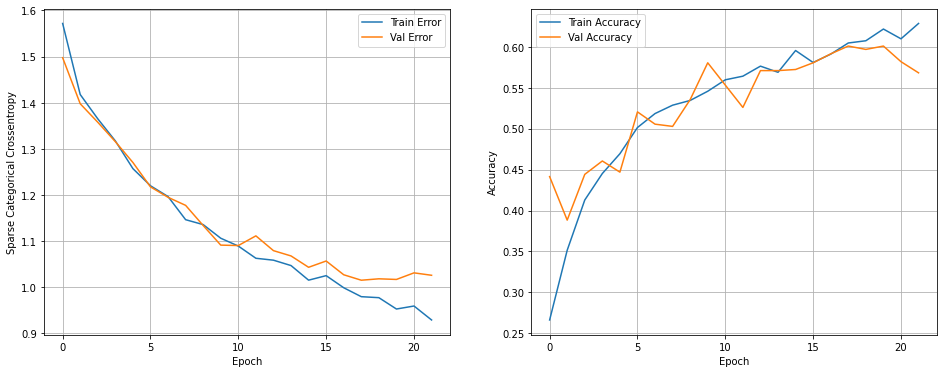

In [125]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=4,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)


epochs = 25
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es_callback]
)

show_loss_accuracy_evolution(history)

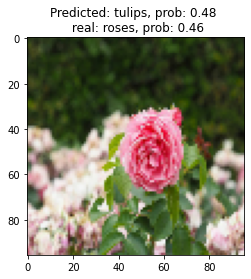

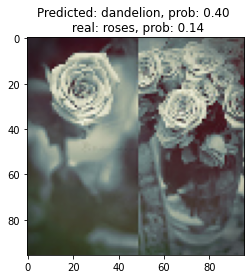

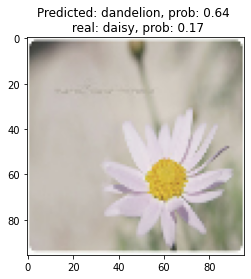

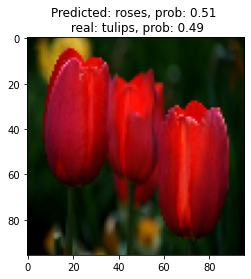

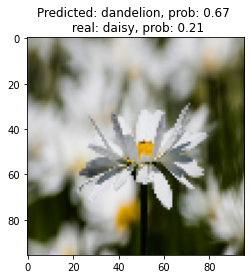

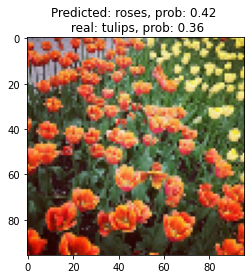

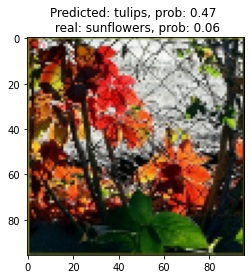

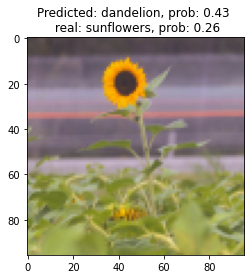

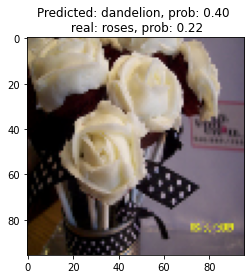

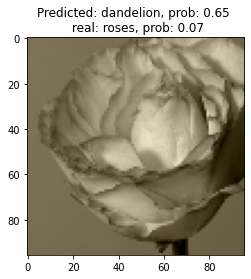

In [126]:
show_errors(val_ds, model, class_names_list, n_images=10)

### Data Augmentation

[**data augmentation**](https://en.wikipedia.org/wiki/Data_augmentation) We transform randomly the training images.

Data augmentation can be done before starting any training directly on the available image set, or working with the [Keras layers for that purpose](https://www.tensorflow.org/tutorials/images/data_augmentation). In that example we will do it the second way by randomly rotating, flipping and scaling the images.

In [133]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.25),
    layers.RandomZoom(0.25),
    layers.RandomContrast(0.1),
 #   layers.RandomBrightness(factor=0.2)
  ]
)

Some examples

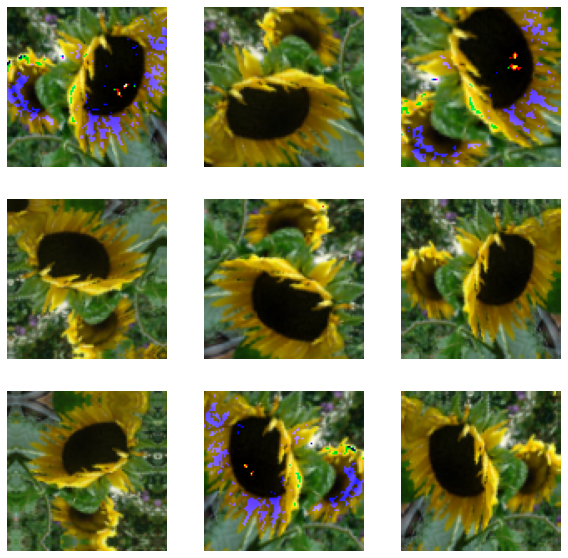

In [135]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images, training=True)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

We include the stage that performs the transformations in the images at the beginning of the model that we built previously, we repeat the training and visualize the results.

In [136]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
data_aug = data_augmentation(inputs)
reescaling = layers.Rescaling(1. / 255)(data_aug)

# Conv Layer 1
conv_1 = layers.Conv2D(8, 3, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(8, 3, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(name='pool_2')(conv_2)

# Conv Layer 3
conv_3 = layers.Conv2D(8,
                       3,
                       padding='valid',
                       activation='relu',
                       name='conv_3')(pool_2)
pool_3 = layers.MaxPooling2D(name='pool_3')(conv_3)

# Fully-connected
flat = layers.Flatten(name='flatten')(pool_3)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')

Epoch 1/10
46/46 [==============================] - 2s 26ms/step - loss: 1.5727 - accuracy: 0.2779 - val_loss: 1.4353 - val_accuracy: 0.3365
Epoch 2/10
46/46 [==============================] - 1s 13ms/step - loss: 1.3536 - accuracy: 0.4404 - val_loss: 1.2392 - val_accuracy: 0.4877
Epoch 3/10
46/46 [==============================] - 1s 13ms/step - loss: 1.2086 - accuracy: 0.4854 - val_loss: 1.2375 - val_accuracy: 0.4877
Epoch 4/10
46/46 [==============================] - 1s 13ms/step - loss: 1.1553 - accuracy: 0.5320 - val_loss: 1.2609 - val_accuracy: 0.4850
Epoch 5/10
46/46 [==============================] - 1s 13ms/step - loss: 1.1306 - accuracy: 0.5385 - val_loss: 1.1882 - val_accuracy: 0.5245
Epoch 6/10
46/46 [==============================] - 1s 13ms/step - loss: 1.0902 - accuracy: 0.5542 - val_loss: 1.1038 - val_accuracy: 0.5763
Epoch 7/10
46/46 [==============================] - 1s 13ms/step - loss: 1.0909 - accuracy: 0.5613 - val_loss: 1.0687 - val_accuracy: 0.5804
Epoch 8/10
46

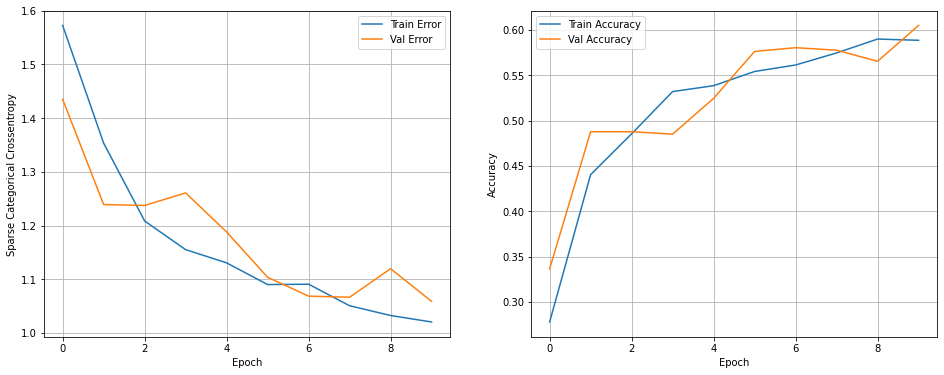

In [137]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=10,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es_callback]
)
show_loss_accuracy_evolution(history)

#### Question 4: Use the best model you have found and include the `data_aug` layer, compare the results

In [ ]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
data_aug = data_augmentation(inputs)
reescaling = layers.Rescaling(1. / 255)(data_aug)
...

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=10,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es_callback]
)
show_loss_accuracy_evolution(history)

In [ ]:
show_errors(val_ds, model, class_names_list, n_images=10)

## Transfer learning

With transfer learning, you benefit from both advanced convolutional neural network architectures developed by top researchers and from pre-training on a huge dataset of images. In our case we will be transfer learning from a network trained on ImageNet, a database of images containing many plants and outdoors scenes, which is close enough to flowers.

<img src="https://i.ibb.co/KsLSGyt/transfer-learning.png" alt="transfer-learning" border="0">

[MobileNetV2](https://arxiv.org/abs/1801.04381) is a significant improvement over MobileNetV1 and pushes the state of the art for mobile visual recognition including classification, object detection and semantic segmentation.

In [`tf.keras.applications`](https://www.tensorflow.org/api_docs/python/tf/keras/applications) you have many pre-trained models. You can compare them [here](https://keras.io/api/applications/#available-models).

With the parameter `include_top=False`, you can delete the last `softmax` layer.

With `pretrained_model.trainable = False`, you freeze the pre-trained model weights. 

Hay miles de aplicaciones, vamos a usar el MobileNetV2 porque es ligero tiene poco tamaño, es rapido y tiene buen accuracy. Tiene 88 capas. Es un modelo muy potente y lo vamos a usar como modelo previo. 

En keras lo llamamos con el tamaño de la imagen, ponemos que no incluya la capa final (include_top=False) porque este modelo estaba diseñado para predecir clases d eimagenes de mil y ahora nosotros lo queremos para predecir la clase de las flores. 

Lo declaramos como un modelo, no lo entrenamos, congelamos los pesos 

In [138]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=image_size+(3,), include_top=False)
pretrained_model.trainable = False
pretrained_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                 

We need to use the same **preprocessing** as in the model

In [139]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

You define your new model adding more layers

Declaramos un modelo de transfer learning con el preprocesado entrenado y congelado. Y añadimos simplemente una capa densa de 5 con softmax porque queremos clasificar imagenes de 5 tipos de flores. 

In [140]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')

# pre-trained model
x = preprocess_input(inputs)
x = pretrained_model(x)

# classifier
flat = tf.keras.layers.Flatten()(x)
flat = tf.keras.layers.Dropout(0.5)(flat)
outputs = tf.keras.layers.Dense(5, activation='softmax')(flat)

model_tl = tf.keras.Model(inputs, outputs)
model_tl.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 96, 96, 3)        0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 96, 96, 3)        0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 11520)             0         
                                                             

In [141]:
model_tl.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [142]:
epochs = 5
history = model_tl.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
46/46 [==============================] - 5s 51ms/step - loss: 1.0962 - accuracy: 0.7299 - val_loss: 0.5463 - val_accuracy: 0.8529
Epoch 2/5
46/46 [==============================] - 1s 25ms/step - loss: 0.3795 - accuracy: 0.8832 - val_loss: 0.5543 - val_accuracy: 0.8678
Epoch 3/5
46/46 [==============================] - 1s 24ms/step - loss: 0.2041 - accuracy: 0.9275 - val_loss: 0.5646 - val_accuracy: 0.8678
Epoch 4/5
46/46 [==============================] - 1s 24ms/step - loss: 0.1428 - accuracy: 0.9499 - val_loss: 0.6194 - val_accuracy: 0.8597
Epoch 5/5
46/46 [==============================] - 1s 26ms/step - loss: 0.1242 - accuracy: 0.9588 - val_loss: 0.6271 - val_accuracy: 0.8774


Vemos que con 5 epocas ya llega a 0.877, es muy potente 

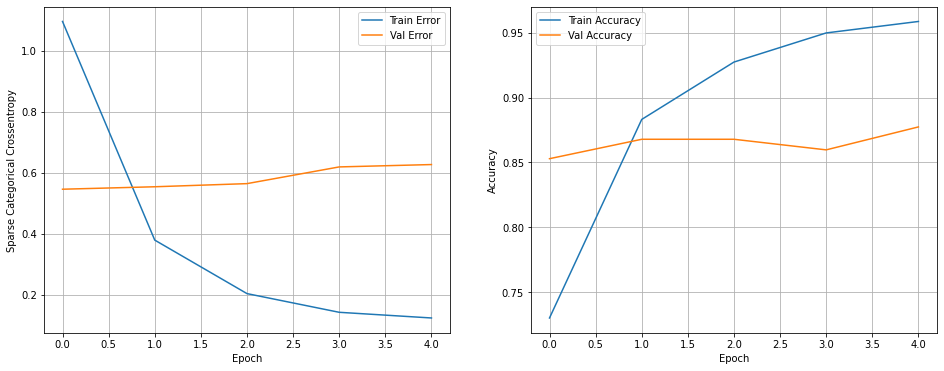

In [143]:
show_loss_accuracy_evolution(history)

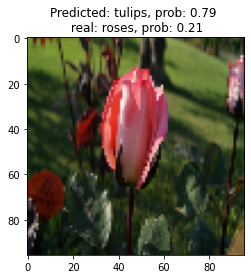

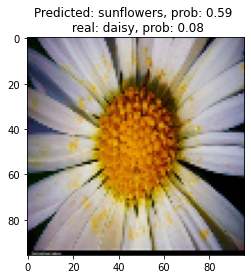

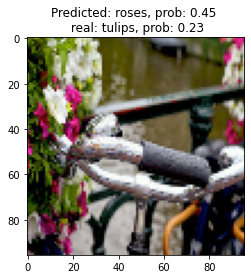

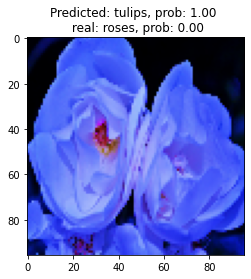

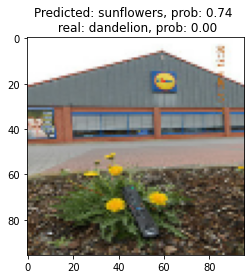

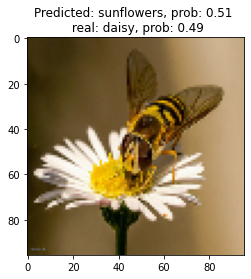

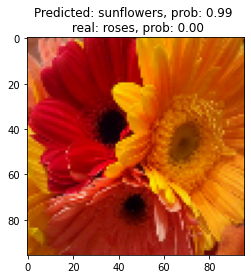

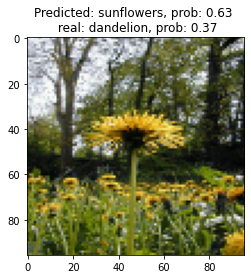

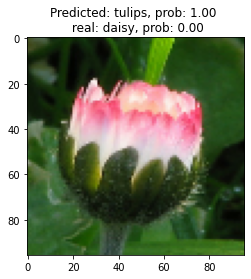

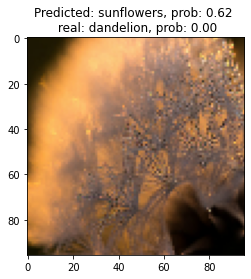

In [144]:
show_errors(val_ds, model_tl, class_names_list, n_images=10)

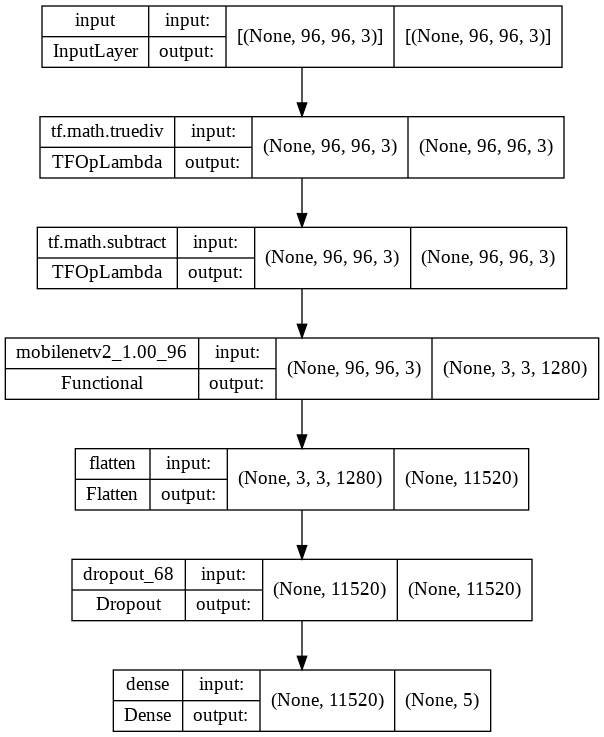

In [145]:
from tensorflow.keras.utils import plot_model
plot_model(model_tl, show_shapes=True)

Podemos jugar con el modelo. 
Podemos dividirlo en dos ramas, una el modelo y otro modelo aparte. Porque el modelo preentrenado estaba diseñado para predecir otro tipo de imagenes, por lo tanto se puede perder informacion. 

Añadimos unas capas de convolucion 

In [146]:
inputs = tf.keras.Input(shape=image_size+(3, ), name='input')

#data_aug = data_augmentation(inputs)
reescaling = preprocess_input(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(16, 3, padding='valid',
                       activation='relu', name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(
    2, 2),  name='pool_1')(conv_1)
pool_1 = layers.Dropout(0.4)(pool_1)

# Conv Layer 2
conv_2 = layers.Conv2D(16, 3, padding='valid',
                       activation='relu', name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(name='pool_2')(conv_2)
pool_2 = layers.Dropout(0.4)(pool_2)

# Conv Layer 3
conv_3 = layers.Conv2D(16, 3, padding='valid',
                       activation='relu', name='conv_3')(pool_2)
pool_3 = layers.MaxPooling2D(name='pool_3')(conv_3)
pool_3 = layers.Dropout(0.4)(pool_3)

# Fully-connected
x1 = layers.Flatten(name='flatten')(pool_3)

x2 = pretrained_model(reescaling, training=False)
x2 = tf.keras.layers.Flatten()(x2)

x = tf.keras.layers.Concatenate()([x1, x2])
x = layers.Dropout(0.4)(x)
x = layers.Dense(64, activation='relu', name='dense')(x)
# A Dense classifier with a single unit (binary classification
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
model_tl = keras.Model(inputs, outputs)

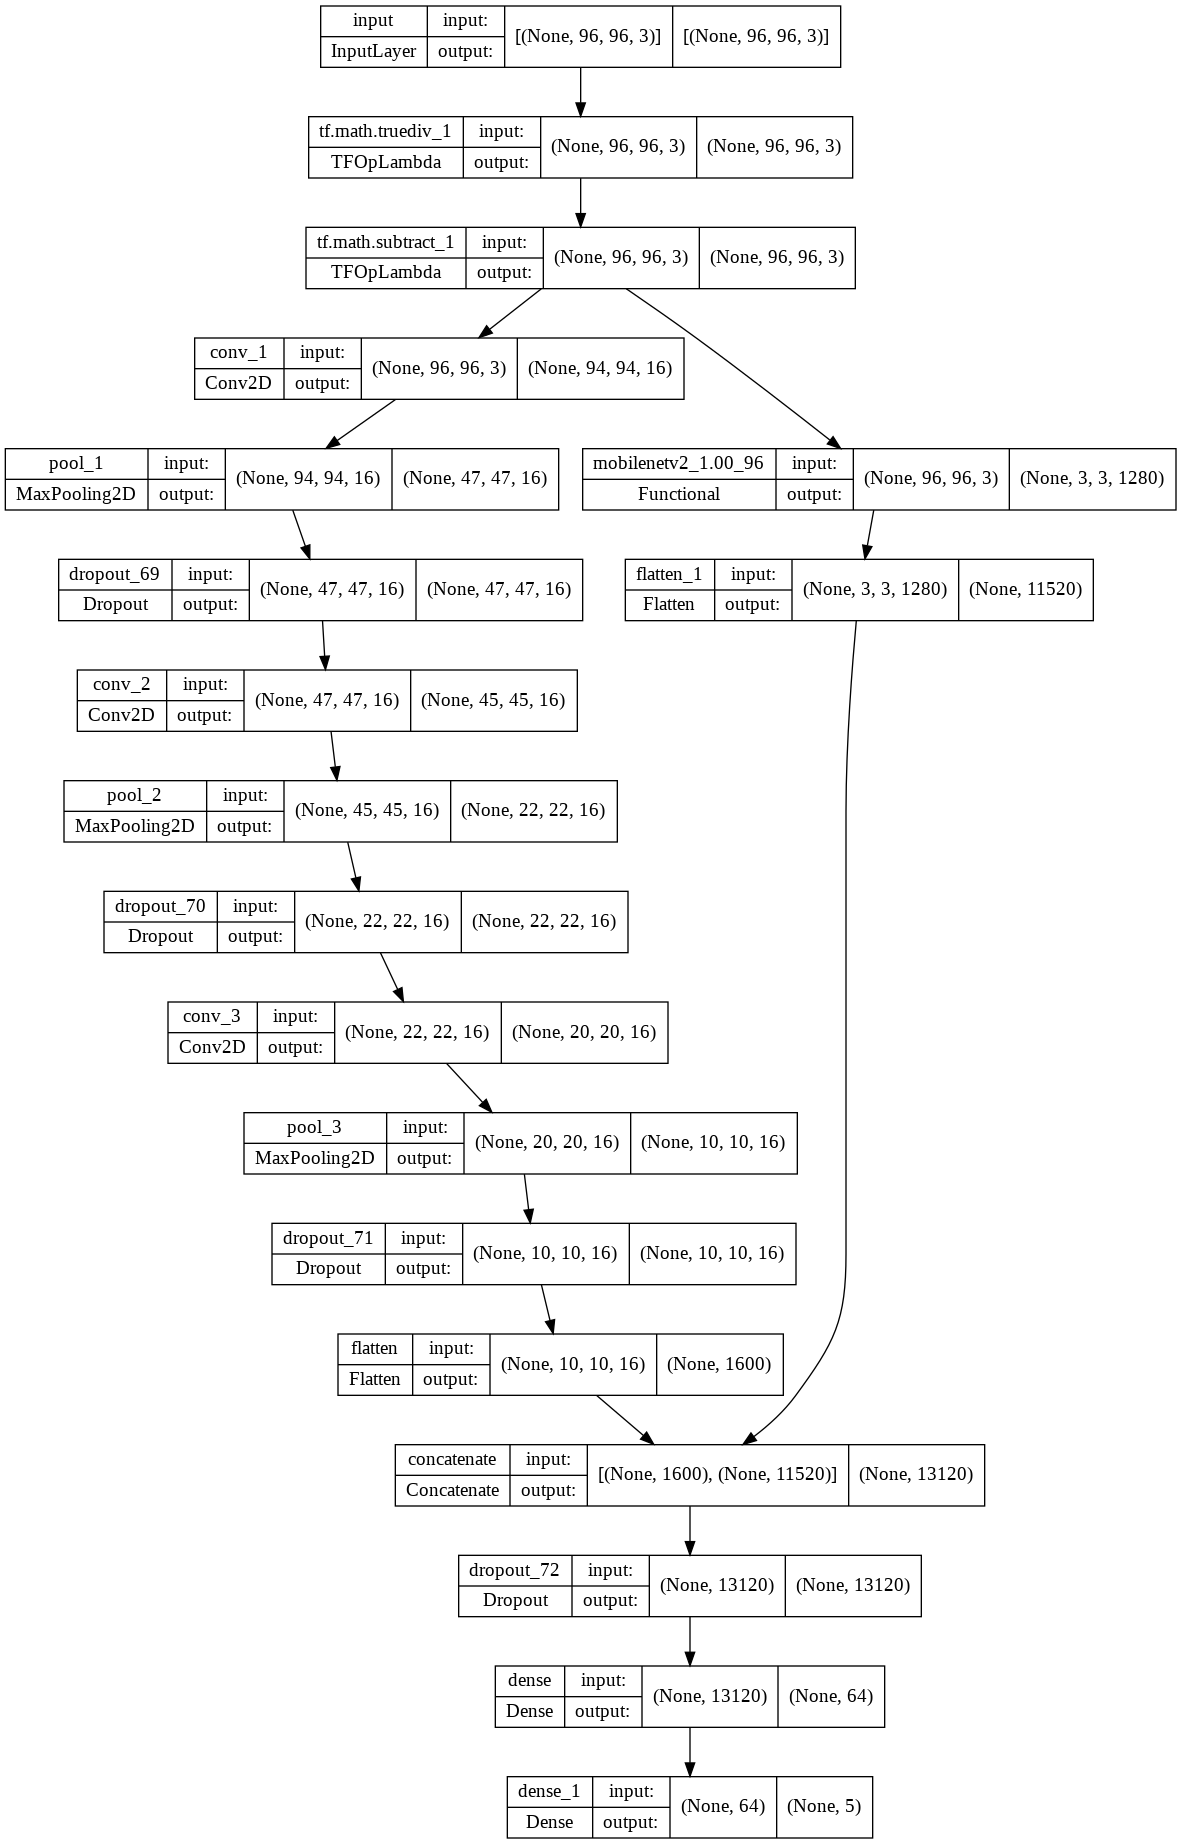

In [147]:
from tensorflow.keras.utils import plot_model
plot_model(model_tl, show_shapes=True)

In [148]:
model_tl.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
epochs = 15
history = model_tl.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
46/46 [==============================] - 5s 50ms/step - loss: 1.0901 - accuracy: 0.7149 - val_loss: 0.4122 - val_accuracy: 0.8515
Epoch 2/15
46/46 [==============================] - 1s 30ms/step - loss: 0.2733 - accuracy: 0.9009 - val_loss: 0.3911 - val_accuracy: 0.8719
Epoch 3/15
46/46 [==============================] - 1s 29ms/step - loss: 0.1423 - accuracy: 0.9486 - val_loss: 0.4359 - val_accuracy: 0.8719
Epoch 4/15
46/46 [==============================] - 1s 29ms/step - loss: 0.0953 - accuracy: 0.9680 - val_loss: 0.5097 - val_accuracy: 0.8569
Epoch 5/15
46/46 [==============================] - 1s 30ms/step - loss: 0.0516 - accuracy: 0.9847 - val_loss: 0.4472 - val_accuracy: 0.8801
Epoch 6/15
46/46 [==============================] - 1s 30ms/step - loss: 0.0380 - accuracy: 0.9911 - val_loss: 0.4942 - val_accuracy: 0.8678
Epoch 7/15
46/46 [==============================] - 1s 30ms/step - loss: 0.0257 - accuracy: 0.9939 - val_loss: 0.4889 - val_accuracy: 0.8719
Epoch 8/15
46

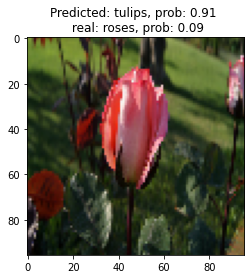

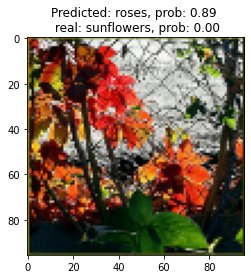

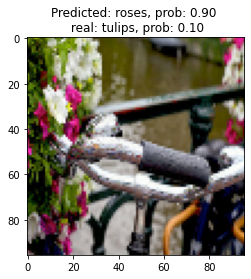

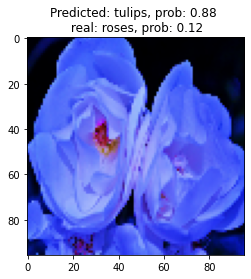

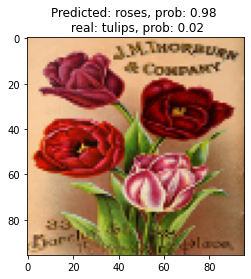

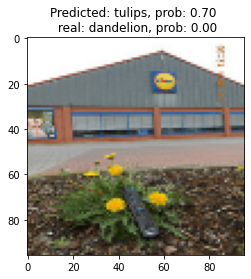

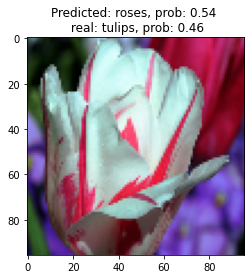

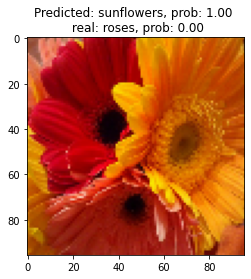

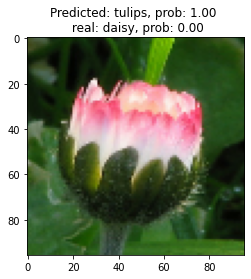

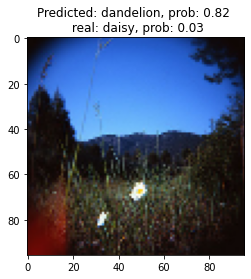

In [149]:
show_errors(val_ds, model_tl, class_names_list, n_images=10)

### Fine-tuning

Es lo mismo pero reentrenando los pesos, no congelandolos. Esto generalmente funciona peor, a no ser que tengamos muchos datos y va a tardar mucho.

In [ ]:
epochs = 20
model_tl = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    tf.keras.applications.MobileNetV2(input_shape=image_size+(3, ), include_top=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model_tl.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
history = model_tl.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

## Practice: Fashion MNIST Try to obtain  `Test Accuracy>0.89`!!

Fashion MNIST dataset contains 70,000 grayscale images with 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="300">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

**Categories**:
<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [150]:
# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

print('train_images shape: {0}, test_images shape: {1}'.format(
    train_images.shape, test_images.shape))

4431872/4422102 [==============================] - 0s 0us/step
train_images shape: (60000, 28, 28), test_images shape: (10000, 28, 28)


In [151]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
    'Sneaker', 'Bag', 'Ankle boot'
]

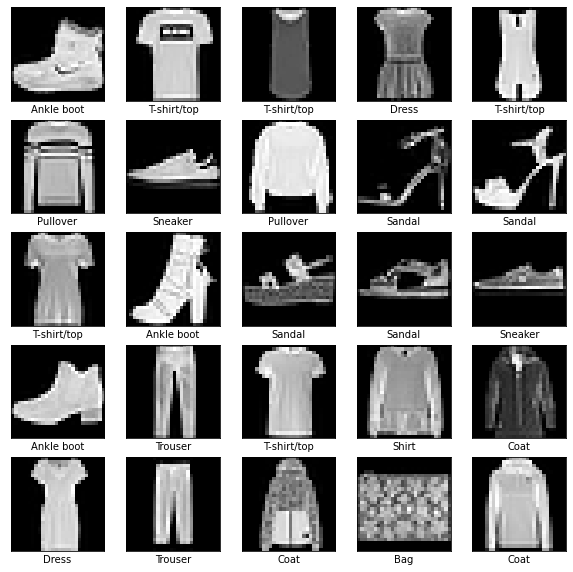

In [152]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [153]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(),
    layers.experimental.preprocessing.RandomRotation(0.25),
  ]
)

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(),
  ]
)

In [161]:
inputs = tf.keras.Input(shape=(28, 28, 1), name='input')
aug = data_augmentation(inputs)

reescaling = layers.Rescaling(1. / 255)(aug)


# Conv Layer 1
conv_1 = layers.Conv2D(4, 3, padding='same', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(3,3), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(4, 3, padding='same', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(3, 3), name='pool_2')(conv_2)

# Fully-connected
# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_mnist')

In [162]:
### compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [163]:
### train
model.fit(train_images, train_labels,
          epochs=7, batch_size=32, validation_split=0.2)

Epoch 1/7
1500/1500 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 2/7
1500/1500 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 3/7
1187/1500 [======================>.......] - ETA: 1s - loss: nan - accuracy: 0.1000

KeyboardInterrupt: ignored

In [158]:
results = model.evaluate(test_images, test_labels, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Test Loss: nan
Test Accuracy: 0.10000000149011612


### Plotting predictions

In [159]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, -1)
predictions.shape, predicted_classes.shape
predictions[i,:]

array([nan, nan, nan, nan, nan], dtype=float32)

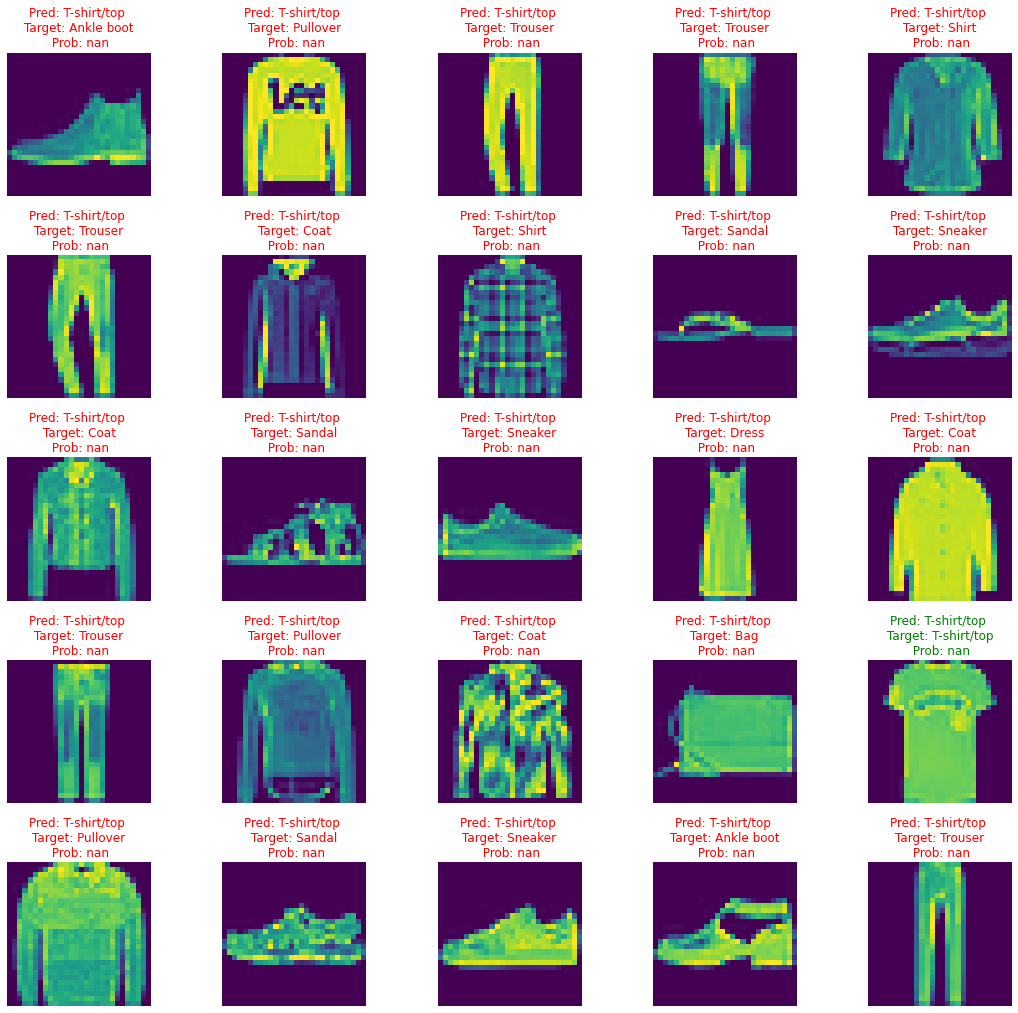

In [160]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(18, 18))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(test_images[i].reshape(28, 28))
    prob_pred = np.max(predictions[i, :])
    class_pred = class_names[int(predicted_classes[i])]
    original_class = class_names[int(test_labels[i])]
    if class_pred == original_class:
        color = 'green'
    else:
        color = 'red'
    title = "Pred: {0} \n Target: {1} \n Prob: {2:.3f}".format(
    class_pred, original_class, prob_pred)
    axes[i].set_title(title, color=color)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)